In [ ]:
!nvidia-smi

In [ ]:
import torch
torch.cuda.is_available()

In [1]:
!git clone https://github.com/David-Zhao-1997/High-frequency-Stereo-Matching-Network

Cloning into 'High-frequency-Stereo-Matching-Network'...
remote: Enumerating objects: 100, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 100 (delta 22), reused 8 (delta 8), pack-reused 69
Receiving objects: 100% (100/100), 1007.94 KiB | 3.16 MiB/s, done.
Resolving deltas: 100% (39/39), done.


Upload the following files to `/content/High-frequency-Stereo-Matching-Network`:

* `inference.py`
* `DLNR_Middlebury.pth` / `DLNR_SceneFlow.pth`

In [2]:
!pip install scipy
!pip install tqdm
!pip install tensorboard
!pip install opt_einsum
!pip install imageio
!pip install opencv-python
!pip install scikit-image
!pip install einops

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 1.2 MB/s eta 0:00:00


Upload test images to `/content/High-frequency-Stereo-Matching-Network`.

In [4]:
%cd /content/High-frequency-Stereo-Matching-Network
!python3 inference.py -l /content/High-frequency-Stereo-Matching-Network/roses_L.png -r /content/High-frequency-Stereo-Matching-Network/roses_R.png --corr_implementation reg

/content/High-frequency-Stereo-Matching-Network
checkpoints: ./DLNR_SceneFlow.pth
Traceback (most recent call last):
  File "/content/High-frequency-Stereo-Matching-Network/inference.py", line 144, in <module>
    demo(args)
  File "/content/High-frequency-Stereo-Matching-Network/inference.py", line 63, in demo
    model.load_state_dict(torch.load(args.restore_ckpt))
  File "/usr/local/lib/python3.10/dist-packages/torch/serialization.py", line 1028, in load
    return _legacy_load(opened_file, map_location, pickle_module, **pickle_load_args)
  File "/usr/local/lib/python3.10/dist-packages/torch/serialization.py", line 1246, in _legacy_load
    magic_number = pickle_module.load(f, **pickle_load_args)
_pickle.UnpicklingError: invalid load key, '\xab'.


checkpoints: ./DLNR_SceneFlow.pth
Found 1 images. Saving files to Andreea_output/
  0% 0/1 [00:00<?, ?it/s]/content/High-frequency-Stereo-Matching-Network/roses_R_rotated.png
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:4296: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
2.1657912731170654
100% 1/1 [00:02<00:00,  2.25s/it]


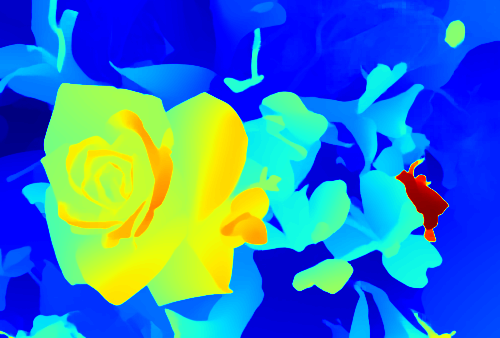

True

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

'''
Rotate left and right input images
'''
left_img = cv2.imread("/content/High-frequency-Stereo-Matching-Network/roses_L.png")
rotated_left_img = left_img[:, ::-1]
# cv2_imshow(rotated_left_img)
cv2.imwrite("roses_L_rotated.png", rotated_left_img)

right_img = cv2.imread("/content/High-frequency-Stereo-Matching-Network/roses_R.png")
rotated_right_img = right_img[:, ::-1]
# cv2_imshow(rotated_right_img)
cv2.imwrite("roses_R_rotated.png", rotated_right_img)


'''
Generate rotated version of right disparity map
'''
!python3 inference.py -l /content/High-frequency-Stereo-Matching-Network/roses_R_rotated.png -r /content/High-frequency-Stereo-Matching-Network/roses_L_rotated.png --corr_implementation reg
'''
Correct orientation of right disparity map
'''
right_disp_rotated = cv2.imread("/content/High-frequency-Stereo-Matching-Network/Andreea_output/High-frequency-Stereo-Matching-Network.png")
# cv2_imshow(right_disp_rotated)
right_disp = right_disp_rotated[:, ::-1]
cv2_imshow(right_disp)
cv2.imwrite("Andreea_output/roses_right_disparity.png", right_disp)